In [1]:
!pip install transformers
!pip install datasets

     |████████████████████████████████| 4.0 MB 35.6 MB/s 
     |████████████████████████████████| 77 kB 9.7 MB/s 
     |████████████████████████████████| 596 kB 86.9 MB/s 
     |████████████████████████████████| 6.6 MB 71.3 MB/s 
     |████████████████████████████████| 895 kB 69.8 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 325 kB 35.4 MB/s 
     |████████████████████████████████| 136 kB 19.8 MB/s 
     |████████████████████████████████| 1.1 MB 59.0 MB/s 
     |████████████████████████████████| 212 kB 51.6 MB/s 
     |████████████████████████████████| 127 kB 64.9 MB/s 
     |████████████████████████████████| 271 kB 56.8 MB/s 
     |████████████████████████████████| 94 kB 1.7 MB/s 
     |████████████████████████████████| 144 kB 69.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urll

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import json
import pandas as pd
BASE_DIR = "/content/drive/MyDrive/NLP_ENSAE/"
json_name = "Digital_Music.json"
os.chdir(BASE_DIR)
df = pd.read_json(os.path.join(BASE_DIR, json_name), lines = True)
df = df.drop(['image', 'reviewerID', 'asin'], axis = 1)
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [4]:
df.head()

,index,overall,verified,reviewTime,style,reviewerName,reviewText,summary,unixReviewTime,vote
0,4,5,False,"01 7, 2012",{'Format:': ' Audio CD'},J. Bynum,Keith Green / So you wanna go back to Egypt......,A great one from Keith with a guest appearance...,1325894400,6
1,5,5,False,"07 8, 2009",{'Format:': ' MP3 Music'},Mark the Pizza guy,"Clever,inspired and moving. This is a great al...",AWSOME,1247011200,2
2,7,5,False,"05 4, 2008",{'Format:': ' Audio CD'},William G. Simon,Keith Green is a bit of legend in some Christi...,"Heartfelt, Passionate and Funny - Green is Mas...",1209859200,10
3,17,5,True,"02 25, 2014",{'Format:': ' MP3 Music'},Bryan,Keith's music is a timeless message. Since hi...,Never Gets Old,1393286400,2
4,55,5,False,"09 24, 2004",{'Format:': ' Audio CD'},Joshua L. Wilson,"Don Francisco's ""Early Works"" are filled with ...",The Early Works is filled with passion and hum...,1095984000,16


In [5]:
df = df[:50000]

In [6]:
df.shape

(50000, 10)

# Lemmatization

In [7]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
import spacy
nlp = spacy.load("en_core_web_sm")
from spacy.lemmatizer import Lemmatizer
from spacy.lookups import Lookups

#from spacy.lemmatizer import Lemmatize
from spacy.lang.en import English
lemmatizer = English.Defaults.create_lemmatizer()
#from spacy.lang.en import LEMMA_INDEX, LEMMA_EXC, LEMMA_RULES

# Instanciating lemmatizer
#lemmatizer = Lemmatizer(LEMMA_INDEX, LEMMA_EXC, LEMMA_RULES)
lemmatizer = nlp.Defaults.create_lemmatizer()
print('loaded')
# Usage: lemmatizer(token, POS(token))
# But we will rather use spacy's nlp engine


loaded


In [8]:
# Counting lemmas vocabulary count
df['reviewText_lem'] = df.reviewText.apply(lambda x: " ".join([w.lemma_ for w in nlp(x)])).array
# arr = [ x for X in arr for x in X]
# print("Number of unique lemmas found with Spacy's lemmatizer: {}".format(len(set(arr))))
df.head()
#30 secondes pour 1000 données

,index,overall,verified,reviewTime,style,reviewerName,reviewText,summary,unixReviewTime,vote,reviewText_lem
0,4,5,False,"01 7, 2012",{'Format:': ' Audio CD'},J. Bynum,Keith Green / So you wanna go back to Egypt......,A great one from Keith with a guest appearance...,1325894400,6,Keith Green / so -PRON- wanna go back to Egypt...
1,5,5,False,"07 8, 2009",{'Format:': ' MP3 Music'},Mark the Pizza guy,"Clever,inspired and moving. This is a great al...",AWSOME,1247011200,2,"Clever , inspire and move . this be a great al..."
2,7,5,False,"05 4, 2008",{'Format:': ' Audio CD'},William G. Simon,Keith Green is a bit of legend in some Christi...,"Heartfelt, Passionate and Funny - Green is Mas...",1209859200,10,Keith Green be a bit of legend in some christi...
3,17,5,True,"02 25, 2014",{'Format:': ' MP3 Music'},Bryan,Keith's music is a timeless message. Since hi...,Never Gets Old,1393286400,2,Keith 's music be a timeless message . since...
4,55,5,False,"09 24, 2004",{'Format:': ' Audio CD'},Joshua L. Wilson,"Don Francisco's ""Early Works"" are filled with ...",The Early Works is filled with passion and hum...,1095984000,16,"Don Francisco 's "" Early Works "" be fill with ..."


In [9]:
from unicodedata import normalize


df['reviewText_lem'] = df['reviewText_lem'].str.lower()

# pattern = r"[^\w\s]"
# df['reviewText_lem'] = df['reviewText_lem'].str.replace(pat=pattern, repl=" ", regex=True)
pattern = r"\&\#[0-9]+\;\[^\w\s]"
df['reviewText_lem'] = df['reviewText_lem'].str.replace(pat=pattern, repl=" ", regex=True)
remove_accent = lambda text: normalize("NFKD", text).encode("ascii", "ignore").decode("utf-8", "ignore")

df['reviewText_lem'] = df['reviewText_lem'].apply(remove_accent)

In [10]:
from wordcloud.wordcloud import STOPWORDS
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stops = set(stopwords.words('english'))
stops.add('&')
stops.add('-')
stops.add(',')
stops.add('.')
print(stops)

STOPWORDS = {'during', "you've", 'any', 'i', 'our', 'these', 'about', 'at', 'your', 'having', 'have', 'did', 'for', 'here', 
             'what', "you'll", 't', 'does', "you're", 'ma', 'didn', 'being', 'ain', 'yours', 'each', 'just', 'should', 
             'a', 'she', 'this', 'ours', 'am', 'themselves', 'that', 'yourself', 'theirs',
             'them', 'wasn', 'he', 'aren', 'above', 'by', 's', 'now', 'their', 'once', ',', 've', 'where', 'and', 'to', 
             'until', 'myself', 'couldn', "isn't", 'ourselves', 'nor', 'herself', 'are', "won't", 'itself', '-', 
             'all', 'weren', 'doing', 'has', 'too', 'won', 'into', 'don', 'how', 'on', "mightn't", 'll', 'hadn', 'wouldn', "didn't",
             'do','been', "doesn't", 'm', 'if', "aren't", 'before', 'her', '.', "hadn't", "wouldn't",
             'an', "she's", 'why', 'with', 'shan', 'some', "should've", 'isn', 'which', "shouldn't", 'other', "couldn't", 
             "weren't", 'had', 'again', 'they', 'be', 'or', 'when', 'yourselves', 'no', 'against', "that'll", 'haven', 'you', 'we',
             'same', 'doesn', "shan't", 'himself', 'because', 'as', 'after', 'shouldn', "it's", 'more', 'him', 'there', 'whom', 'not',
             "haven't", "mustn't", 'such', 'but', 'both', "hasn't", 'under', 'then', 'it', 'hasn', '&', 'below', 'is', 'his', "don't",
             'y', "you'd", 're', 'hers', 'through', 'o', 'd', 'will', "wasn't", 'while', 'me', 'down', 'mightn', 'was', 'my', 'of', 'its',
             'were', 'needn', 'the', 'who', 'from', 'own', 'those','.', 'it'}


stop_words = stopwords.words("english")

stop_words = [word.replace("\'", "") for word in stop_words]

print(f"sample stop words: {stop_words[:15]} \n")

remove_stop_words = lambda row: " ".join([token for token in row.split(" ") if token not in stop_words])
df['reviewText_lem'] = df['reviewText_lem'].apply(remove_stop_words)



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
{'hasn', 'did', "it's", 'were', 'ours', 'more', "you'll", 'after', 'an', 'up', 'don', 'weren', 'won', 'yourselves', 'some', 'herself', '&', "couldn't", 'yourself', 'mustn', 'shan', "she's", 'when', 'each', 'she', "mightn't", 'his', 'few', "you'd", 'which', 'into', 'it', "aren't", 'than', 'once', "should've", 'off', 'above', 'has', 'he', 'o', 'yours', 'does', 's', 'now', 'mightn', 'll', 'there', "needn't", 'for', 'then', 'didn', 'you', 'against', "doesn't", 'whom', 'their', 'are', 'any', 'couldn', "mustn't", 'to', 'd', 'having', "won't", "isn't", 'below', 'him', 'with', 'wasn', 'under', 'that', 'and', 'myself', 'how', 'most', 'ourselves', 'those', 'other', 'do', 'between', 'from', '.', 'should', 'needn', 're', '-', 'wouldn', 'the', "wasn't", 'its', 'themselves', 'm', "shan't", 'why', 'am', 'very', 'was', 'just', 'as', 'nor', "wouldn't", "weren't", 'again', 'my', 'during', "you'

In [11]:
pattern = r"[\s]+"
df['reviewText_lem'] = df['reviewText_lem'].str.replace(pat=pattern, repl=" ", regex=True)

In [12]:
corpora = df['reviewText_lem'].values
tokenized = [corpus.split(" ") for corpus in corpora]

In [13]:
from gensim.models import Phrases
from gensim.models.phrases import Phraser

bi_gram = Phrases(tokenized, min_count=300, threshold=50)

tri_gram = Phrases(bi_gram[tokenized], min_count=300, threshold=50)

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


In [14]:
uni_gram_tokens = set([token for text in tokenized for token in text])
uni_gram_tokens = set(filter(lambda x: x != "", uni_gram_tokens))

print(list(uni_gram_tokens)[:50])

['b001c58m9i', 'tree63', 'utf8">machaut', 'nikelback', 'pentameter', 'baldreformer.wordpress.com', "dosen't", 'awww', 'snit', 'b000eq46jg', 'eclipser', 'psalm', 'silverchair', 'salley', 'destressed', 'nevskys', 'mictlan', 'urgently', 'case', 'inaccuracy', '-up', 'unstilted', 'sisters', 'complacent', 'nineties', 'discouraging', 'ambiguity', 'stjepan', 'inclusionary', 'hahahhaha', 'penelope', 'teenage/20something', 'pollute', 'molecule', 'oohs', 'overshare', 'beling', 'janowski', 'svastir', 'cuddly', 'danish', 'seduit', 'galuten', '36/39', 'plame', 'jahaziel', 'href="/katherine', '20/46', 'lexington', 'quarantee']


In [15]:
from gensim.corpora.dictionary import Dictionary

vocabulary = Dictionary(tokenized)

vocabulary_keys = list(vocabulary.token2id)[0:10]

for key in vocabulary_keys:
    print(f"ID: {vocabulary.token2id[key]}, Token: {key}")

ID: 0, Token: -pron-
ID: 1, Token: .
ID: 2, Token: ...
ID: 3, Token: /
ID: 4, Token: :
ID: 5, Token: across
ID: 6, Token: album
ID: 7, Token: back
ID: 8, Token: bob
ID: 9, Token: dylan


#bag of words

In [16]:
bow = [vocabulary.doc2bow(doc) for doc in tokenized]

for idx, freq in bow[0]:
    print(f"Word: {vocabulary.get(idx)}, Frequency: {freq}")

Word: -pron-, Frequency: 3
Word: ., Frequency: 2
Word: ..., Frequency: 1
Word: /, Frequency: 1
Word: :, Frequency: 1
Word: across, Frequency: 1
Word: album, Frequency: 2
Word: back, Frequency: 1
Word: bob, Frequency: 1
Word: dylan, Frequency: 1
Word: egypt, Frequency: 1
Word: example, Frequency: 1
Word: five, Frequency: 1
Word: get, Frequency: 1
Word: go, Frequency: 1
Word: good, Frequency: 1
Word: green, Frequency: 1
Word: harmonica, Frequency: 1
Word: humor, Frequency: 1
Word: keith, Frequency: 2
Word: message, Frequency: 1
Word: play, Frequency: 1
Word: serious, Frequency: 1
Word: star, Frequency: 1
Word: wanna, Frequency: 1
Word: wonderful, Frequency: 1


tf-idf

In [17]:
from gensim.models.tfidfmodel import TfidfModel

tfidf = TfidfModel(bow)

for idx, weight in tfidf[bow[0]]:
    print(f"Word: {vocabulary.get(idx)}, Weight: {weight:.3f}")

Word: -pron-, Weight: 0.007
Word: ., Weight: 0.006
Word: ..., Weight: 0.092
Word: /, Weight: 0.108
Word: :, Weight: 0.103
Word: across, Weight: 0.194
Word: album, Weight: 0.084
Word: back, Weight: 0.098
Word: bob, Weight: 0.194
Word: dylan, Weight: 0.199
Word: egypt, Weight: 0.358
Word: example, Weight: 0.185
Word: five, Weight: 0.176
Word: get, Weight: 0.062
Word: go, Weight: 0.077
Word: good, Weight: 0.053
Word: green, Weight: 0.237
Word: harmonica, Weight: 0.286
Word: humor, Weight: 0.242
Word: keith, Weight: 0.511
Word: message, Weight: 0.182
Word: play, Weight: 0.093
Word: serious, Weight: 0.211
Word: star, Weight: 0.124
Word: wanna, Weight: 0.236
Word: wonderful, Weight: 0.133


word embedding

In [18]:
%%time
import numpy as np

from gensim.models import word2vec

np.set_printoptions(suppress=True)

feature_size = 100
context_size = 20
min_word = 1

word_vec= word2vec.Word2Vec(tokenized, size=feature_size, \
                            window=context_size, min_count=min_word, \
                            iter=50, seed=42)

CPU times: user 11min 1s, sys: 2.55 s, total: 11min 3s
Wall time: 3min 57s


In [19]:
word_vec_unpack = [(word, idx.index) for word, idx in \
                   word_vec.wv.vocab.items()]

tokens, indexes = zip(*word_vec_unpack)

word_vec_df = pd.DataFrame(word_vec.wv.syn0[indexes, :], index=tokens)

display(word_vec_df.head())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
keith,2.284562,-2.704366,-0.812243,4.423608,-1.087070,-5.270724,3.250135,2.551769,0.311369,-0.594806,...,2.430617,-3.036259,6.735801,5.714419,3.425676,-2.106781,0.722349,1.569748,-2.424450,-0.451284
green,-3.564975,-1.845009,1.248147,0.894422,0.186534,-2.941789,-0.374262,-0.892498,-3.136452,2.436844,...,-3.730311,4.432090,-1.392622,-2.259291,3.804179,-1.290737,-3.072292,-5.905965,-3.445184,-4.236086
/,0.851055,-0.766238,3.724185,-0.475392,-3.772229,-1.080130,2.382743,-2.058341,2.287117,3.801204,...,-1.539420,3.402353,-0.088321,5.380479,-1.054138,-2.098201,1.124261,0.205007,-1.095165,-4.827176
-pron-,-0.626764,-1.731010,-1.554164,1.535073,0.608904,-0.783467,-0.592192,3.683372,-0.489494,-4.053550,...,3.394221,-0.649809,-1.969614,0.366509,0.999908,0.166125,1.957432,0.290973,0.164890,0.041825
wanna,4.885550,0.720510,-0.451280,4.626977,0.996547,-3.309373,-4.996557,-0.658474,-1.497499,2.631953,...,-0.538958,2.097008,1.664008,2.818602,-4.514763,-3.684727,-0.842846,0.747608,-0.724266,-6.306782


In [20]:
%%time
tokenized_array = np.array(tokenized)

model_array = np.array([word_vec_df.loc[doc].mean(axis=0) for doc in tokenized_array])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


CPU times: user 46.7 s, sys: 291 ms, total: 47 s
Wall time: 46.5 s


In [21]:
model_df = pd.DataFrame(model_array)
model_df["label"] = df["overall"]

display(model_df.head())

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
0,-0.207801,-1.203809,-0.020163,0.910244,-0.206122,-1.386756,-1.067103,1.336749,-1.073540,-1.407629,...,-0.621412,0.274877,0.346708,0.764448,-0.742186,-0.087629,0.001135,-0.190465,-0.773226,5
1,-1.278467,-1.601874,-0.422228,0.659409,0.769272,-1.570669,-0.903220,2.009710,-0.800470,-1.903412,...,-0.715990,-0.872108,-0.133457,0.498958,0.606252,0.717744,-0.748347,0.296962,0.541180,5
2,-0.296602,-1.299540,-0.088092,0.417715,0.154593,-0.635981,-0.391624,1.666078,0.210430,-1.483848,...,-0.589076,-0.467646,-0.153947,0.199392,-0.312898,0.376308,-0.749068,0.417451,0.217526,5
3,-0.596376,-1.893583,-0.394017,1.170666,1.010933,-1.785372,-0.181946,2.143203,0.414960,-1.831638,...,-0.311091,-0.301116,-0.069729,0.945611,-0.197801,0.903400,-0.508512,0.480346,0.434517,5
4,-0.236865,-1.541981,-0.293690,1.130956,0.463525,-0.630686,-0.896887,2.031828,-0.229775,-1.844366,...,-0.474114,-0.606484,-0.134046,0.619253,-0.414879,0.543704,-0.138476,0.411940,-0.186212,5


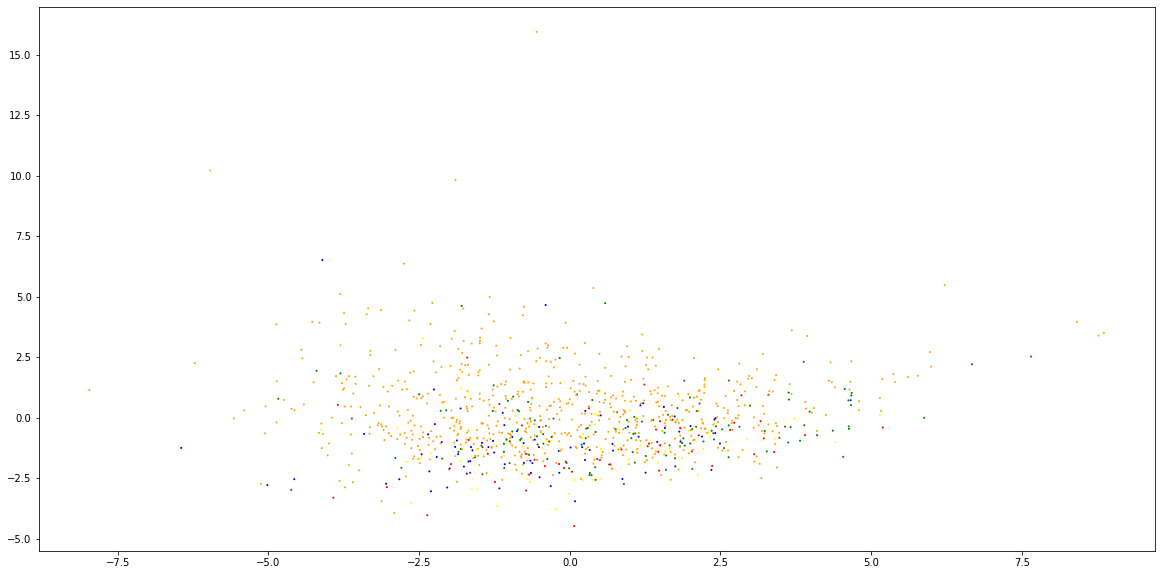

In [22]:
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

#sampling the model_df population
pca_df = model_df.reset_index()
pca_df = model_df.dropna(axis=0).iloc[:,1:]
pca_df = pca_df.iloc[::50]

#setting up PCA
pca = PCA(n_components=2, random_state=42)
pca = pca.fit_transform(pca_df.iloc[:, :-1])
labels = pca_df["label"]

#setting up plot components
x_axis = pca[:,0]
y_axis = pca[:,1]
color_map = pca_df["label"].map({1:"blue", \
                                 2:"red", \
                                 3:"yellow", \
                                 4:"green", \
                                 5:"orange"})

#plotting PCA
f, axes = plt.subplots(figsize=(20,10))
plt.scatter(x_axis, y_axis, color=color_map, s=1)
plt.show()

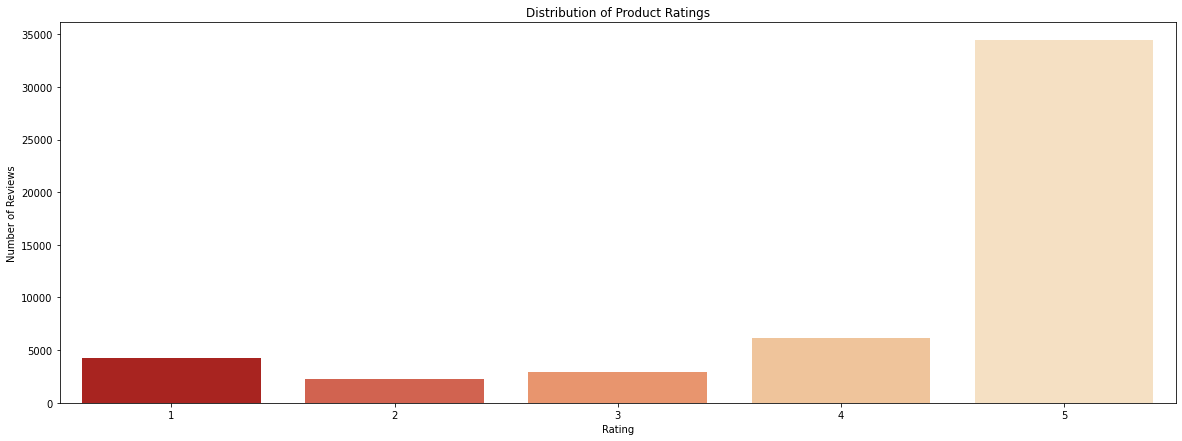

In [23]:
import seaborn as sns

f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(x=df["overall"], palette="OrRd_r")
ax.set(title="Distribution of Product Ratings", \
       xlabel="Rating", ylabel="Number of Reviews")
plt.show()

In [24]:
majority = df["overall"] == 5
majority_ratio = len(df[majority]) / len(df)

print(f"{majority_ratio*100:.2f}%")

68.83%


In [25]:
count = len(model_df[model_df["label"] == 2])
print(f"Size of the most underrepresented class: {count}")

Size of the most underrepresented class: 2231


In [26]:
#trim the majority class
condition = model_df["label"] == 5
trimmed_df = model_df[condition].sample(n=count, random_state=42)

#trim other class and add on to the trimmed_df
for rating in [1, 2, 3, 4]:
    condition = model_df["label"] == rating
    if len(model_df[condition]) >= count:
        add_df = model_df[condition].sample(n=count, random_state=42)
    else:
        add_df = model_df[condition]
    trimmed_df = pd.concat([trimmed_df, add_df], ignore_index=False)

#display new class sizes of trimmed_df
for rating in [1, 2, 3, 4, 5]:
    class_size = len(trimmed_df[trimmed_df["label"] == rating])
    print(f"Size of Class {rating}: {class_size}")

Size of Class 1: 2231
Size of Class 2: 2231
Size of Class 3: 2231
Size of Class 4: 2231
Size of Class 5: 2231


In [27]:
trimmed_df = trimmed_df.sort_values(by="label")
display(trimmed_df.head())

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,label
20977,0.325183,0.533456,-1.256988,0.421041,0.442260,-0.893505,-1.117393,1.481021,-1.368863,-1.926996,...,-0.022250,-0.138380,0.437138,-0.176663,0.667387,1.509084,0.018097,-1.003880,0.116018,1
44683,0.099408,0.023810,-0.321316,1.212387,0.357532,-1.347801,0.538987,0.960373,0.776540,-2.323631,...,-0.723997,-1.591561,-0.106809,0.114644,0.916408,0.687597,0.443970,-0.739693,0.002379,1
37745,-0.423864,-0.585901,0.162043,1.189758,0.092729,-0.645823,0.061923,1.676919,-0.019758,-1.815514,...,-0.191015,-1.196501,-0.434341,-0.149857,0.635328,0.336979,-0.365285,-0.087441,-0.078920,1
32551,-0.169811,-1.068074,-1.133769,1.041616,0.053739,0.237201,-1.018783,2.120265,-0.379337,-1.779111,...,-0.417092,-0.652839,-0.707820,0.338257,0.661529,0.310610,-0.071169,0.747362,0.328549,1
15117,-0.583528,-0.466950,-1.169401,1.264281,-0.053652,-0.512448,-0.405423,1.605090,0.020216,-1.513372,...,-0.740301,-0.487113,-0.504895,0.684339,-0.101831,0.046027,0.466829,0.506815,1.148439,1


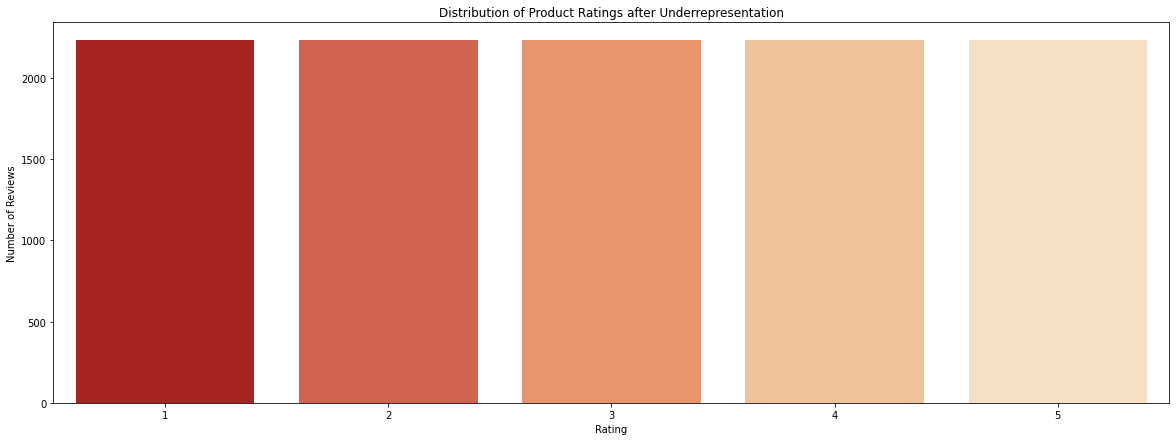

In [28]:
f, axes = plt.subplots(figsize=(20,7))
ax = sns.countplot(x=trimmed_df["label"], palette="OrRd_r")
ax.set(title="Distribution of Product Ratings after Underrepresentation", \
       xlabel="Rating", ylabel="Number of Reviews")
plt.show()

In [29]:
from sklearn.model_selection import train_test_split

X = trimmed_df.iloc[:, :-1]
y = trimmed_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

In [30]:
from sklearn import metrics

label_shape = np.shape(y_test)
y_baseline = np.full(label_shape, 5)

accuracy_baseline = metrics.accuracy_score(y_test, y_baseline)
f1_score_baseline = metrics.f1_score(y_test, y_baseline, average="micro")

print(f"Baseline Accuracy: {accuracy_baseline*100:.3f}%")
print(f"Baseline F1 Score: {f1_score_baseline:.3f}")

Baseline Accuracy: 19.989%
Baseline F1 Score: 0.200


In [32]:
from sklearn.model_selection import train_test_split

X = model_df.iloc[:, :-1]
y = model_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=25, class_weight={1:10, 2:12, 3:7, 4:9, 5:1}, \
                                criterion="entropy", random_state=42)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_train)

accuracy = metrics.accuracy_score(y_train, y_pred)
f1_score = metrics.f1_score(y_train, y_pred, average="micro")

print(f"Training Set Accuracy: {accuracy*100:.3f}%")
print(f"Training Set F1 Score: {f1_score:.3f}")


Training Set Accuracy: 99.880%
Training Set F1 Score: 0.999


In [33]:
y_pred = forest.predict(X_test)

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Training Set Accuracy: {accuracy*100:.3f}%")
print(f"Training Set F1 Score: {f1_score:.3f}")


Training Set Accuracy: 72.728%
Training Set F1 Score: 0.727


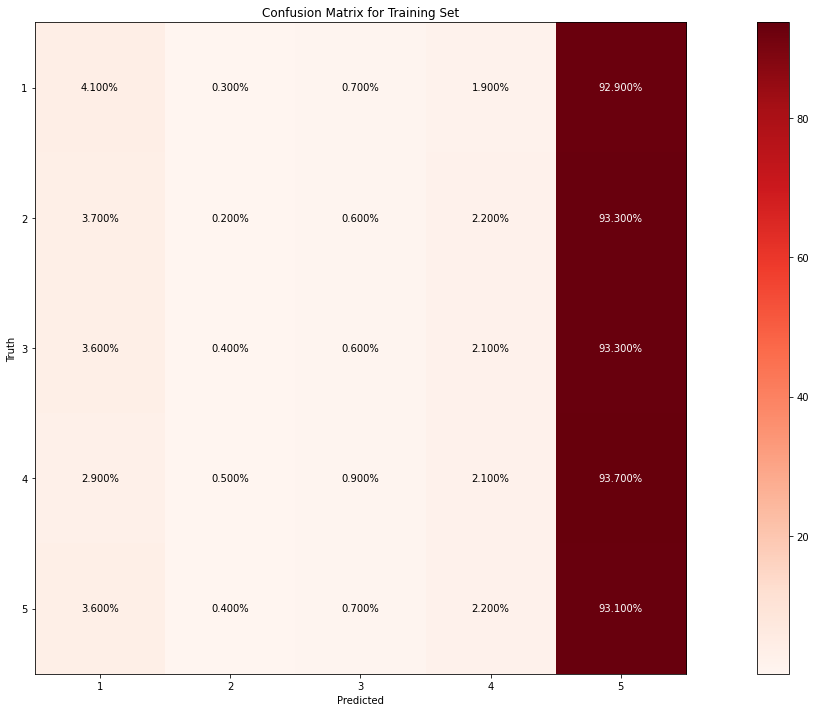

In [34]:
from sklearn.metrics import confusion_matrix

#create the confusion matrix of the training set
confusion_train = confusion_matrix(y_train, y_pred)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]
confusion_train = np.around(confusion_train, decimals=3)*100

#create confusion matrix heat map
f, axes = plt.subplots(figsize=(20,10))
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

axes.figure.colorbar(im, ax=axes)
axes.set(title="Confusion Matrix for Training Set", \
         xticks=np.arange(confusion_train.shape[1]), \
         yticks=np.arange(confusion_train.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

#add clear annotations to the confusion matrix
threshold = confusion_train.max()/1.5
for i in range(confusion_train.shape[0]):
    for j in range(confusion_train.shape[1]):
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
                ha="center", va="center",
                color="white" if confusion_train[i, j] > threshold else "black")
f.tight_layout()
plt.show()

In [35]:
from sklearn.model_selection import cross_val_score

cross_val_accuracy = cross_val_score(forest, X_train, y_train, \
                               cv=3, scoring="accuracy")
cross_val_f1 = cross_val_score(forest, X_train, y_train, \
                               cv=3, scoring="f1_micro")

cross_val_accuracy = np.mean(cross_val_accuracy)
cross_val_f1 = np.mean(cross_val_f1)

print(f"Training Set Accuracy: {cross_val_accuracy*100:.3f}%")
print(f"Training Set F1 Score: {cross_val_f1:.3f}")

Training Set Accuracy: 71.752%
Training Set F1 Score: 0.718


In [36]:
%%time
import xgboost as xgb

y_train_shifted = y_train-1
y_test_shifted = y_test-1

train_set = xgb.DMatrix(X_train, label=y_train_shifted)
test_set = xgb.DMatrix(X_test, label=y_test_shifted)

parameters = {"max_depth": 10, "eta": 0.2, "silent": 1, \
              "objective": "multi:softprob", "num_class": 5}

boost = xgb.train(parameters, train_set, 100)

CPU times: user 9min 20s, sys: 543 ms, total: 9min 21s
Wall time: 2min 42s


In [37]:
y_pred = boost.predict(train_set)
y_pred = y_pred.argmax(axis=1)
y_pred = y_pred+1

accuracy = metrics.accuracy_score(y_train, y_pred)
f1_score = metrics.f1_score(y_train, y_pred, average="micro")

print(f"Training Set Accuracy: {accuracy*100:.3f}%")
print(f"Training Set F1 Score: {f1_score:.3f}")

Training Set Accuracy: 99.988%
Training Set F1 Score: 1.000


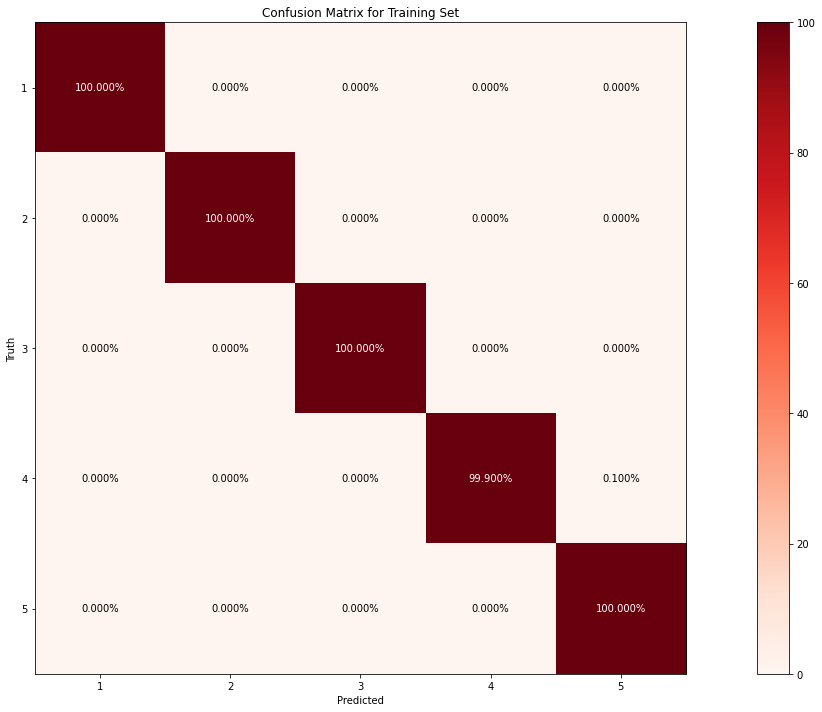

In [38]:
#create the confusion matrix of the training set
confusion_train = confusion_matrix(y_train, y_pred)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]
confusion_train = np.around(confusion_train, decimals=3)*100

#create confusion matrix heat map
f, axes = plt.subplots(figsize=(20,10))
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

axes.figure.colorbar(im, ax=axes)
axes.set(title="Confusion Matrix for Training Set", \
         xticks=np.arange(confusion_train.shape[1]), \
         yticks=np.arange(confusion_train.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

#add clear annotations to the confusion matrix
threshold = confusion_train.max()/1.5
for i in range(confusion_train.shape[0]):
    for j in range(confusion_train.shape[1]):
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
                ha="center", va="center",
                color="white" if confusion_train[i, j] > threshold else "black")
f.tight_layout()
plt.show()

In [39]:
%%time
boost_cv = xgb.cv(dtrain=train_set, params=parameters, nfold=3, \
                  num_boost_round=50, early_stopping_rounds=10, \
                  metrics="merror", as_pandas=True, seed=42)

display(boost_cv.head())

,train-merror-mean,train-merror-std,test-merror-mean,test-merror-std
0,0.14646,0.004772,0.32504,0.006783
1,0.11672,0.003674,0.30356,0.006947
2,0.10074,0.002634,0.29632,0.007820
3,0.08832,0.002067,0.29100,0.006630
4,0.07916,0.003081,0.28692,0.006505


CPU times: user 7min 15s, sys: 330 ms, total: 7min 16s
Wall time: 1min 50s


In [40]:
cross_val_accuracy = boost_cv.iloc[-1,2]
cross_val_accuracy = 1-cross_val_accuracy

print(f"Training Set Accuracy: {cross_val_accuracy*100:.3f}%")

Training Set Accuracy: 73.516%


In [41]:
y_pred = boost.predict(test_set)
y_pred = y_pred.argmax(axis=1)
y_pred = y_pred+1

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Test Set F1 Score: {f1_score:.3f}")

Test Set Accuracy: 74.840%
Test Set F1 Score: 0.748


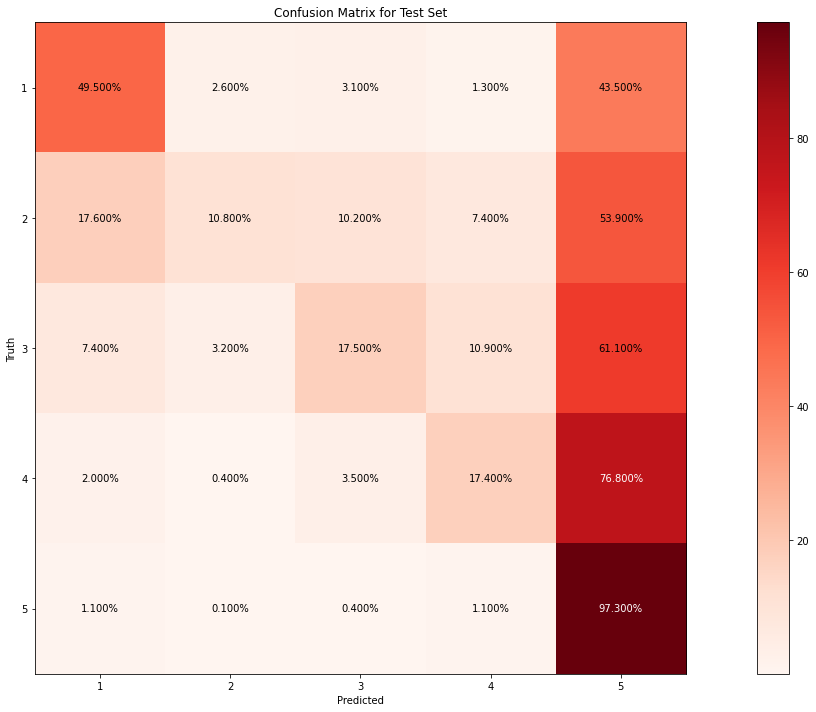

In [42]:
#create the confusion matrix of the test set
confusion_train = confusion_matrix(y_test, y_pred)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]
confusion_train = np.around(confusion_train, decimals=3)*100

#create confusion matrix heat map
f, axes = plt.subplots(figsize=(20,10))
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

axes.figure.colorbar(im, ax=axes)
axes.set(title="Confusion Matrix for Test Set", \
         xticks=np.arange(confusion_train.shape[1]), \
         yticks=np.arange(confusion_train.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

#add clear annotations to the confusion matrix
threshold = confusion_train.max()/1.5
for i in range(confusion_train.shape[0]):
    for j in range(confusion_train.shape[1]):
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
                ha="center", va="center",
                color="white" if confusion_train[i, j] > threshold else "black")
f.tight_layout()
plt.show()


In [43]:
X = trimmed_df.iloc[:, :-1]
y = trimmed_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.5, random_state=42)

In [44]:
y_train_shifted = y_train-1
y_test_shifted = y_test-1

train_set = xgb.DMatrix(X_train, label=y_train_shifted)
test_set = xgb.DMatrix(X_test, label=y_test_shifted)

y_pred = boost.predict(test_set)
y_pred = y_pred.argmax(axis=1)
y_pred = y_pred+1

accuracy = metrics.accuracy_score(y_test, y_pred)
f1_score = metrics.f1_score(y_test, y_pred, average="micro")

print(f"Balanced Test Set Accuracy: {accuracy*100:.3f}%")
print(f"Balanced Test Set F1 Score: {f1_score:.3f}")

Balanced Test Set Accuracy: 72.230%
Balanced Test Set F1 Score: 0.722


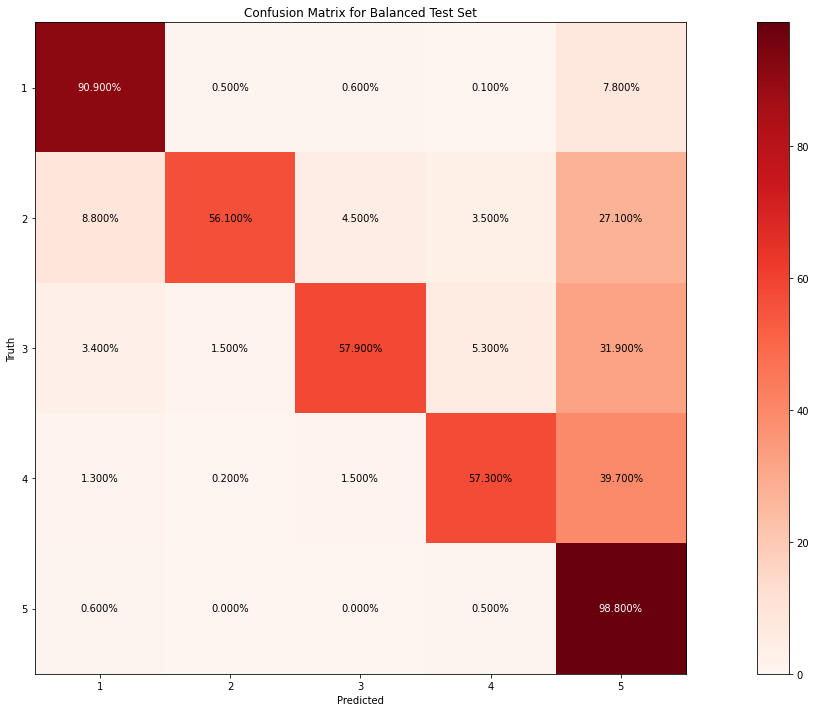

In [45]:
#create the confusion matrix of the balanced test set
confusion_train = confusion_matrix(y_test, y_pred)
confusion_train = confusion_train.astype("float") / \
                   confusion_train.sum(axis=1)[:, np.newaxis]
confusion_train = np.around(confusion_train, decimals=3)*100

#create confusion matrix heat map
f, axes = plt.subplots(figsize=(20,10))
im = axes.imshow(confusion_train, interpolation="nearest", cmap=plt.cm.Reds)

axes.figure.colorbar(im, ax=axes)
axes.set(title="Confusion Matrix for Balanced Test Set", \
         xticks=np.arange(confusion_train.shape[1]), \
         yticks=np.arange(confusion_train.shape[0]), \
         xticklabels=range(1, 6), yticklabels=range(1, 6), \
         xlabel="Predicted", ylabel="Truth")

#add clear annotations to the confusion matrix
threshold = confusion_train.max()/1.5
for i in range(confusion_train.shape[0]):
    for j in range(confusion_train.shape[1]):
        axes.text(j, i, f"{confusion_train[i, j]:.3f}%",
                ha="center", va="center",
                color="white" if confusion_train[i, j] > threshold else "black")
f.tight_layout()
plt.show()

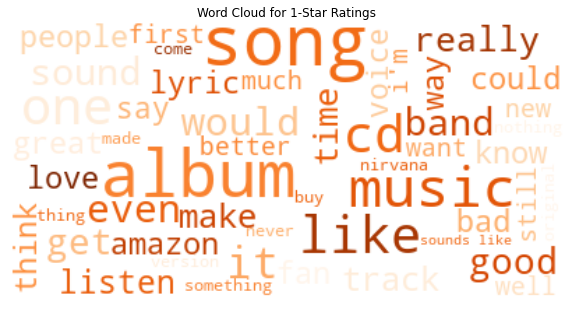

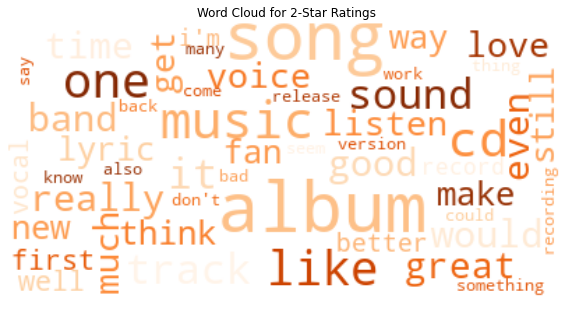

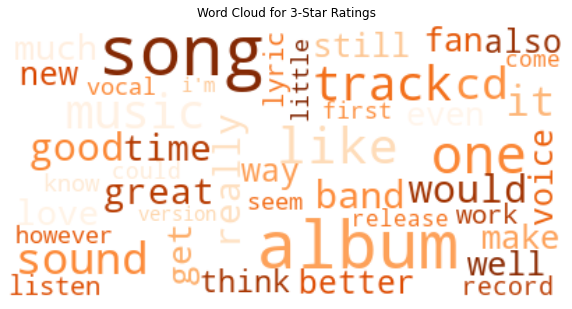

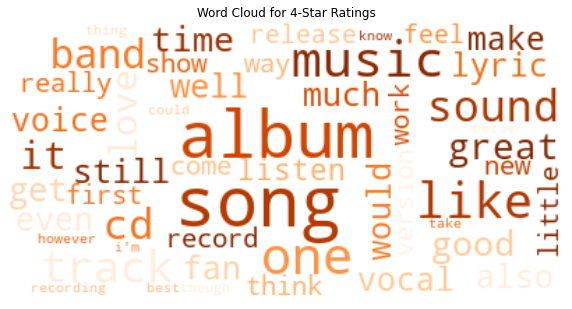

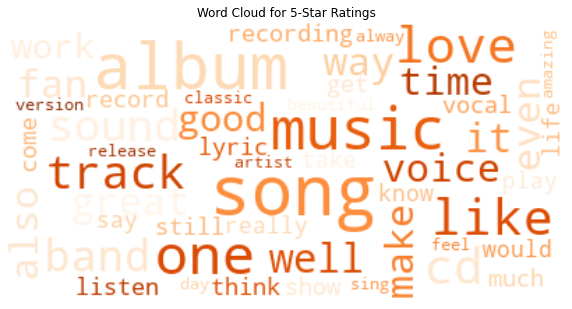

In [46]:
from wordcloud import WordCloud

wordcloud = WordCloud(stopwords = set(stop_words), min_font_size=10, \
                      max_font_size=50, max_words=50, \
                      background_color="white", colormap = "Oranges")

one_star_text = " ".join(df[df["overall"]==1]["reviewText"].values).lower()
two_star_text = " ".join(df[df["overall"]==2]["reviewText"].values).lower()
three_star_text = " ".join(df[df["overall"]==3]["reviewText"].values).lower()
four_star_text = " ".join(df[df["overall"]==4]["reviewText"].values).lower()
five_star_text = " ".join(df[df["overall"]==5]["reviewText"].values).lower()

text_list = [one_star_text, two_star_text, three_star_text, \
             four_star_text, five_star_text]

for index, text in enumerate(text_list):
    f, axes = plt.subplots(figsize=(10,7))
    wordcloud.generate(text)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Word Cloud for {index+1}-Star Ratings")
    plt.axis("off")
    plt.show()